# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

 * The smartcab appears to start in a random position. 
 * The smartcab does not move.
 * The reward the agent received changes, depending on the state of the light and traffic at the intersection in front of the smartcab.
 * The simulation runs a step every few seconds where other cars move, and lights change in the environment.
 * The agent receives a positive reward >2 when the light in front of it is red, as it does not move this seems  sensible.
 * The agent receives a large negative reward (<-4) when the light is green and there is no oncoming traffic.
 * The agent receives a positive reward <1 when the light is green but there is oncoming traffic.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

The LearningAgent class in agent.py has flags learning, epsilon and alpha. *learning* dictates whether the agent is expected to learn or not. If the agent is learning the simulation will show information about current state action/rewards table.

*epsilon* is the random exploration factor. This starts high (1) and reduces as the agent learns. This is the chance that the agent will take a random action instead of what it thinks as the best at the time, hoping to discover an even better action.

*alpha* is the learning factor, how much importance to place on new information at the expense of old. This will affect how the agent learns as it takes actions and the simulation provides it with rewards.

The Environment class in environment.py has a method called *act()* which is called when an agent performs an action. It will perform it if it is legal.

The Simulator class within simulator.py has two methods for displaying state to the user. *render_text()* uses the *print* built-in to send text to stdout and therefore display it in the terminal window. If the *pygame* module is available then *render()* will be called additionally which draws graphic elements to the pygame screen.

RoutePlanner.next_waypoint() within planner.py will consider the EastWest direction first, as it checks for *dx != 0* after checking for being at the destination. The X coordinate will correspond to the East-West position.



-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


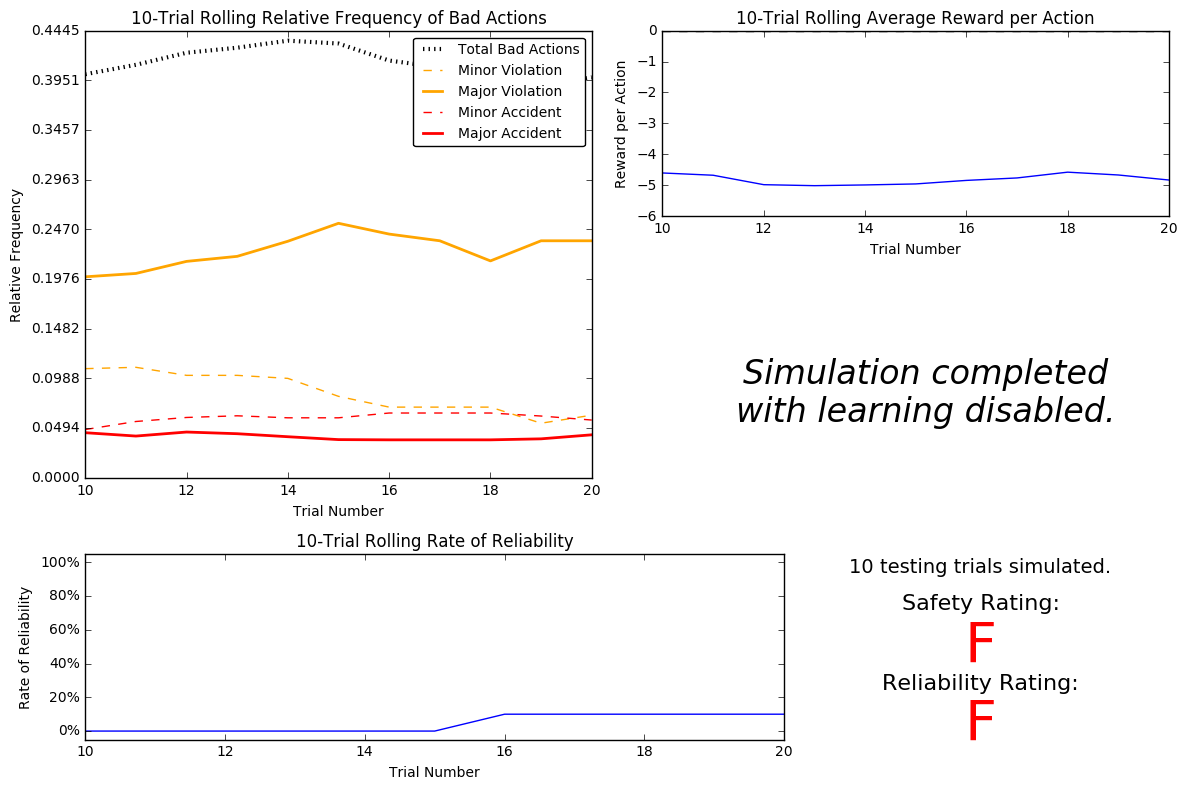

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Bad decisions were made nearly half the time looking at the 10-trial rolling relative frequency of bad decisions. Roughly 25% of these caused either a major or minor accident.

The 10-trial rolling rate of reliablity shows a low but non-zero reliability. With each action equally likely most actions will cause the smartcab to move around the grid. There is a significant chance that by coincidence that smartcab will get to the destination before the time runs out, depending on the deadline. 

Looking at the 10-trial rollong average reward we see that the rewards received are largey negative as this average is around -5. Certainly the consequences of a bad action, which occur consistently, are severe enough to outweigh any good rewards received.

Looking at the trend in all three plots analysed above we don't see any particular trends developing, which is expected since this agent is not learning from its actions. The chance of accident and average reward are relatively constant.

Given the rating system devised for the simulation, we would expect a well performing agent to score an A or B. The classic school grade system assigns a performance in either safety or reliability in the range A to F, with A being best and F worst. The mark received for this agent is F from the 10 tests conducted, for both safety and reliability. This is the lowest score and provides passengers with an indication this smartcab is not fit for purpose and should be avoided, since it will likely have many traffic infringments and accidents and is unlikely to get the passenger to their destination within the deadline.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For safety we are most interested in the presence of other cars in the direction we intend to travel. This means the inputs *left*, *right* and *oncoming* are very important as will help us avoid accidents. We also should respect the colour of *light* in order to not commit any traffic violations, and further reduce risk of accident. *waypoint* and *deadline* are not important from a safety point of view, except perhaps that getting to destination and ending the simulation also stops the possibility of accident or infringment, I think it is best to try and avoid penalty above all else from a safety aspect and assume an infinite deadline to start with.

Therefore for safety I choose: *left*, *right*, *oncoming* and *light*.

For efficiency, we want to get to our destination quickly, therefore heading in the right direction is more important and we will need to put a high importance on the *waypoint* feature. The *left*, *right* and *oncoming* features should be of moderate importance as these can be used to take a path which is clear where several equally good alteratives exist. 

I do not think *deadline* is important since I hope I can get the smartcab to learn to arrive at the destination as quickly and safely as possible using the other features. There is a risk including it will make the smartcab take an illegal move when the deadline is near and cause an accident if the penalty isn't negative enough. Also I would like to avoid the curse of dimonsionality where each additional feature multiplies the number of states that need to be observed during training.

Therefore for efficiency I will keep things simple and just choose *waypoint*. 

Giving *left*, *right*, *oncoming*, *light* and *waypoint* as my selection of features.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

- *left*, *right*, *oncoming* have 4 possible states: None, 'forward', 'left', 'right'
- *light* has two choices: 'red', 'green'
- *waypoint* has 3 possible states: 'forward', 'left', 'right'. None means we are at our destination so not applicable.

Therefore the number of combinations is 4 x 4 x 4 x 2 x 3 = 384 states

At each state we need to consider the reward for each action - *left*, *right*, *forward* and *None* which gives 384 x 4 = 1536 state-actions to try during training.

Using a Monte Carlo simulation with 10000 training iterarions there is only a 10% chance of visiting all these state-actions, therefore it will require a number of training runs in this order assuming we a re equally likely to be presented with each state.

This is reasonable and will probably take only minutes given many iterations can be simulated in a second, even with this unoptimized Python code.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

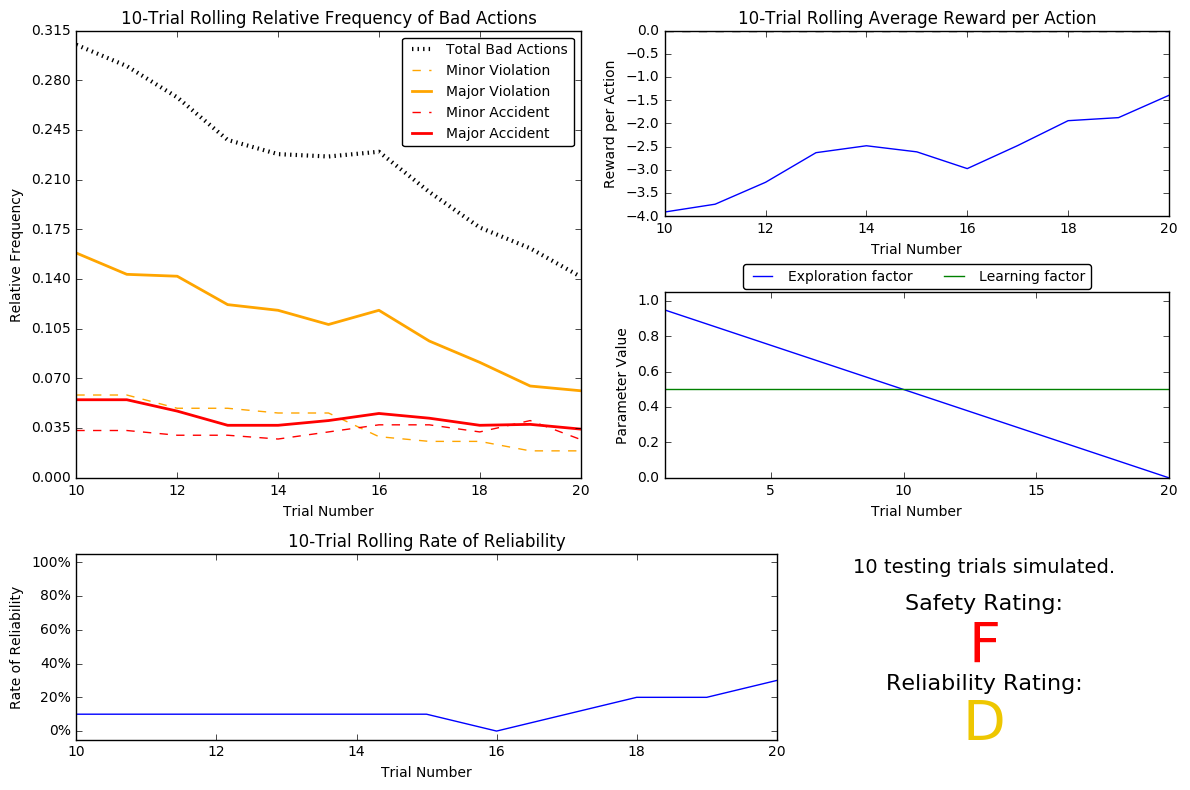

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

My default Q-learning agent disappointly is rated the same as the random agent with an F for safety. The reliability score of D is better, show some progress from the training and that the smartcab makes its destination on time in >60% of trips.

Training took 20 runs which is expected as that will take epsilon to zero, 1.0/0.05 = 20. The exploration factor (epsilon) shows a linear decrease of 0.05 per training run, as expected.

The agent looks to have successfully learned over the training runs as the all 3 charts show a positive change. The frequency of all bad actions decreases, the average reward per action increases and the reliability increase. Thought he reliability increase is less of a trend than the others.

The default Q-learning agent demonstrates better behaviour than the random agent after some learning, so is a better agent but still not good enough to demonstrate to passengers. Looking in the Q table file we see many zero rewards still, this indicates that the training hasn't covered all scenarios and more training should be conducted by decreasing epsilon by less each train, for example.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

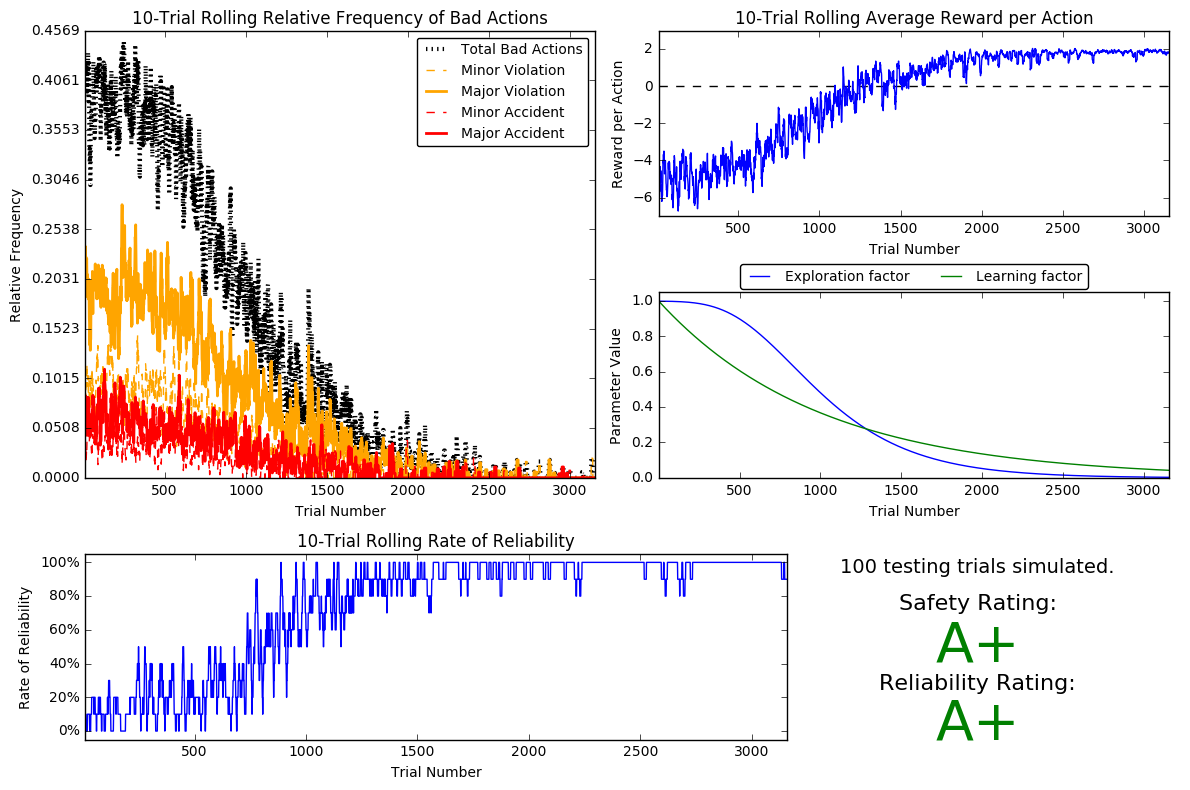

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I used a Gompertz Curve for the decaying function of the exploration factor. I found the suggested functions dropped the value too much initially, so this enabled me to divide the training into an initial exploration followed by later fine-tuning phases: 

$$\epsilon = 1-e^{-8e^{-t/400}}$$

This resulted in just over 3000 trials being conducted before epsilon decreased to below the tolerance threshold.

I used a tolerance of 0.003. The tolerance was set low to increase the number of trials as the evidence indicated the agent continued to learn as the varience of the 10-trial rolling average reward continued to reduce.

An ad-hoc grid search of several different alpha values in the range 0 to 1 led me believe a high value helped train to begin with but a lower value led to better long term results. Therefore I adjusted alpha dynamically so it would start at 1 and then tend towards 0:

$$\alpha = .999^t$$

This agent shows better results than the default Q-learner in both safety and reliabiltiy. The frequency of bad actions is \<0.01 compared with 0.14, obtaining the best A+ score. The reliablity is close to 100% compared to 30% and again receives the top A+ score.

The average reward per action is higher, stabilizing to around 2 which shows the reward scheme is well aligned with the goal of increasing safety and reliability.

This agent shows good enough safety and reliability achieving the top mark in both categories so I am satisfied with the result of the training. Given more time I believe even more training would help.

Further work could be done to reduce the number of states and allow quicker training, especially removing unecessary states after analysing the traffic laws more closely.



### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Given the states I have selected *left*, *right*, *oncoming*, *light* and *waypoint*, one obvious policy would be for any state where *light* is 'red' to result in an action of *None*, except where the laws allow right turn on red and the way is clear.

Other optimal policies would be where a *None* where the intended direction of travel of *waypoint* would be blocked by traffic.

I present some optimal policies for red lights from my Python code in `optimal_policy_check.py` below, a '\*' is a wildcard and indicates *any* value for that item.

```python
# Right turn, left going forward, stay
optimal_policies += [(('forward', '*', '*', 'red', 'right'), None)]

# Right turn, other cases, go
optimal_policies += [(('*', '*', '*', 'red', 'right'), 'right')]

# Any other red light
optimal_policies += [(('*', '*', '*', 'red', '*'), None)]
```

Running my script we find 192 states for which we have defined an optimal policy given the policies above. Of those the agent has learned the optimal action 156 times. This means the learned policy is optimal for the majority of states, but there is certainly room for improvement with longer training, or this is a sign the rewards aren't aligned to the optimal policy.

```
/opt/anaconda27/bin/python2.7 /home/jon/dev/learn/smartcab/smartcab/optimal_policy_check.py
State: ('left', 'forward', 'left', 'red', 'left') Optimal action: None Q: {'forward': -40.16, 'right': 1.16, None: 2.02, 'left': -38.74} Agent optimal? True
State: ('forward', None, 'forward', 'red', 'forward') Optimal action: None Q: {'forward': -39.73, 'right': -19.93, None: 1.84, 'left': -40.04} Agent optimal? True
State: ('left', 'forward', 'forward', 'red', 'forward') Optimal action: None Q: {'forward': -39.95, 'right': 0.63, None: 1.62, 'left': -39.12} Agent optimal? True
State: ('left', 'right', 'forward', 'red', 'left') Optimal action: None Q: {'forward': -6.32, 'right': 0.85, None: 0.0, 'left': -9.87} Agent optimal? False

...
Optimal policy followed in 156/192 matched states
```

I present the first 4 states of the output above, see optimal_policy_check.txt for the full log.
These are all red light states which match the optimal policy with *None* being the highest reward action - the agent has learned to stop at a red light, great! 

The last has *right* as the highest reward action, but this isn't correct as the agent should wait with *None*. The agent has learned it can turn right on a red light under certain circumstances show there is a small reward for *right*, however in this case it should wait and follow the waypoint to the left. We can see *None* has zero reward, indicating we may not have tried this during training and more training is required.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

We're using Q learning and rewards as a mechanism to optmize the reliability and safety rating of our smartcab. The rewards are just a means to this end, and not the goal of the training. Therefore optimizing for maximum rewards on our journey would distract from the goal of an A+/A+ rating. Introducing gamma may actually encourage the smartcab to continue to move around picking up positive rewards when ideally we want to move quickly and safely to our destination. If all rewards were negative then perhaps this wouldn't be an issue.

From an environmental point of view, the enivironment is not static. We have different start and end points for each training run and the other cars and lights change randomly. This would make it impossible to 

with moving cars and changing lights, it would not be possible to compute future rewards without being able to accurately predict future state so it is available at the time the smartcab needs to make the decision. At least not without a sensor that can look into the future which I'm pretty sure this smartcab doesn't have!

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.